# Documentation of project CityAD
### CS107 Final Project Group 12

## Introduction

Automatic Differentiation, or Algorithmic Differentiation, is a term used to describe a collection of techniques that can be used to calculate the derivatives of complicated functions. Because derivatives play a key role in computational analyses, statistics, and machine and deep learning algorithms, the ability to quickly and efficiently take derivatives is a crucial one. Other methods for taking derivatives, however, including Finite Differentiation and Symbolic Differentiation have drawbacks, including extreme slowness, precision errors, inaccurate in high dimensions, and memory intensivity.  Automatic differentiation addresses many of these concerns by providing an exact, high-speed, and highly-applicable method to calculate derivatives. Its importance is evidenced by the fact that it is used as a backbone for TensorFlow, one of the most widely-used machine learning libraries. In this project, we will be implementing an Automatic Differentiation library that can be used as the basis for analysis methods, including an Optimization and Newton’s Method extension that we will illustrate. 

## Background

The principal concept that is going to be leveraged through automatic differentiation is that we will construct the point derivative of every function based on how a function can be decomposed into elementary operations. Computing the derivatives of these different atoms will subsequently enable us to be able to construct derivatives of a wide range of real-valued functions. Therefore, the derivative of every function can be deduced from simple laws : how to derive basic functions (or atoms) and how to handle the derivates on basic operations of functions. This is explained in the following table. We first present the atoms and then present how to handle the derivative on basic operations on functions. Here, x is a real variable and u and v are functions. 

|Atom function   |   Derivative |
|:--------------:|:-------------:|
|<img src="https://render.githubusercontent.com/render/math?math=x^r">|<img src="https://render.githubusercontent.com/render/math?math=r*x^{r-1}">|
|<img src="https://render.githubusercontent.com/render/math?math=ln(x)">|<img src="https://render.githubusercontent.com/render/math?math=\frac{1}{x}">|
|e^x|e^x|
|cos(x)|-sin(x)|
|sin(x)|cos(x)|
|u+v|u'+v'|
|uv|u'v+uv'|
|<img src="https://render.githubusercontent.com/render/math?math=\frac{u}{v}">|<img src="https://render.githubusercontent.com/render/math?math=\frac{u'v-uv'}{v^2}">|

$$Table 1.$$


Now that we know how to compute the derivatives of atoms and how to handle derivatives on basic operations of functions, we want to visualize how can a function be decomposed into thse basic operations.
An important visualization of how a function can be decomposed into several elementary operations is the computational graph. 

For instance, we are going to draw the graph of the function $$f(x,y) =exp(-(sin(x)-cos(y))^2)$$


![images/imagesComputational_graph.jpeg](images/Computational_graph.jpeg)

Therefore, the resulting quantity of interest can be explicitely expressed as a composition of several functions. In order to compute the derivative of these successive compositions, we are going to leverage a powerful mathematical tool: the **chain rule**.
A simple version of the chain rule can be expressed as follows : 
for $f$ and $g$ two functions, $$[f(g)]' = g'*f'(g)$$.

Therefore, from the computational graph we have seen above, we can express the derivative of the function encoded at every node by computing the derivative of this elementary operation and multiplyingby the derivative of the inner function. We know that we are able to compute the derivative of the elementary operation from the derivative of the different atom functions. 
Now, the question is to get the derivative of the inner function, that represents all the composition of the different operations encoded at every node until the current node. We do this iteratively, by applying at every node the chain rule with the previous composition operations. 
This suite of operations is encoded on the trace table. 


![images/Evaluation_table.png](images/Evaluation_table.png)

Therefore, from the previous points, we see that we will be able to compute value of the gradient of a function evaluated on a point by iteratively applying the chain rule at every operation node and leveraging a set of basic derivatives and operation on derivatives.


Let's now move on to a brief background of our extension: optimization. Specifically, Gradient Descent. Gradient Descent is the preferred way to optimize neural networks and other Machine Learning algorithms. There are tens of varients of the algorithm - we have demonstrated 3 of these, namely Adam, Stochastic Gradient Descent, and RMS Prop. 

Gradient Descent, in general, is a way to minimize a certain objective function <img src="https://render.githubusercontent.com/render/math?math=$J(\theta)$"> that is parametrized by a model's parameters <img src="https://render.githubusercontent.com/render/math?math=$\theta \in R^d$">. Essentially, we follow the direction of the slope of the objective function surface downwards until we reach a local minimum ( a valley). More specifically, it updates the parameters in the _opposite_ direction of the gradient of the objective function <img src="https://render.githubusercontent.com/render/math?math=$\nabla_\theta J(\theta)$"> with respect to our parameters. We define a _learning rate_ <img src="https://render.githubusercontent.com/render/math?math=$\eta$"> that determines the size of the steps we take in this direction to reach a local minimum. 


You can see a basic visualization of this process in the graphic below. 

![images/gradientDescentPic.jpeg](images/gradientDescentPic.jpeg)

Additionally, a more 3D visualization of this process can be seen in the graphic below. 

![images/3dgradientDescentPic.jpg](images/3dgradientDescentPic.jpg)

We can use an Adaptive learning rate η allows us to change the size of our steps per iteration based on the current gradient. The graph below compares the error of models that use a static learning rate versus one that uses an adaptive learning rate over a certain number of epochs. As one can see, the adaptive learning rate reaches a lower error more quickly. 

![images/adaptiveLearningRateGraph.png](images/adaptiveLearningRateGraph.png)

We also deal with momentum, which helps accelerate gradient descent and reduces the oscillation, as one can see in the image below. It does this by adding a fraction of the update vector of the past time step to the current update vector. 

![images/momentum.png](images/momentum.png)

  A version of this algorithm is present in almost every advanced machine learning and deep learning library, and it's strength is a testament to how powerful Automatic Differentiation is. 

## How to use

- The url to the project is: https://github.com/cityscape-107/cs107-FinalProject




Our CityAD package is easy to use. Users will have easy access through PyPI.

**Steps to install our package:**


We recommend first setting up an virtual environment such as Anaconda. (This official document gives a good explanation on virtual environment: https://docs.python.org/3/tutorial/venv.html)

- Install Anaconda, you can download it for free at: https://www.anaconda.com/products/individual

- Create a virtual environment:
```
#in command line
conda -V
conda create -n Cityscape
activate Cityscape
```
- Then, 'pip install' our package.
```
pip install CityAD
```

- Inclusivity: We fully understand that some users might not have access to PyPI. Our package is structured in a way that users can make it work even with the simplest 'copy and paste.' In these situations, download our package directly from github: https://github.com/cityscape-107/cs107-FinalProject, copy and paste `ADmulti.py` and `Optimizer.py` to your working folder. 
- Lastly, if any of above does not work for you, please email our maintenance specialist at cityad.helpline@gmail.com for further installation assistance.

We will present the usage of our `Automatic Differentiation (ADmulti)` and `Optimizer` here.

In [1]:
# once you installed
from AD.ADmulti import AD


**How to use Automatic Differentiation?**

First, consider a scalar variable $x$ and the function:
$$
f=x^{2}+2 x+1
$$
where,$$x=1$$

In [2]:
# case 1
# define a scalar variable
x=AD(1,1,'x')
f=x*2+2*x+1
print(f)

Numerical Value is:
[[5.]], 
Jacobian is:
[[4.]], 
Name is:
['x']


Next, consider a more complicated function system, with variable $x=4,y=1,z=3$:
$$
\begin{array}{l}
f_{1}=x^{2}+ln(x)+y-z \\
f_{2}=2 y-z \\
f_{3}=\sin (x)+z
\end{array}
$$

In [3]:
# case 2
# define a (matrix-style) function system
x=AD(4,1,'x')
z=AD(3,1,'z')
y=AD(1,1,'y')

f1=AD([x**2+x.ln()+y-z])
f2=AD([2*y-z])
f3=AD([x.sin()+z])

# v is a function system
v=AD([f1,f2,f3])
print(v)

Numerical Value is:
[[15.38629436]
 [-1.        ]
 [ 2.2431975 ]], 
Jacobian is:
[[-1.          8.25        1.        ]
 [-1.          0.          2.        ]
 [ 1.         -0.65364362  0.        ]], 
Name is:
['z', 'x', 'y']


If the value and Jacobian is not well ordered, we provide a method to sort them, so that you can do matrix operations more easily.

In [4]:
v.sort(['x','y','z'])
print(v)

Numerical Value is:
[[15.38629436]
 [-1.        ]
 [ 2.2431975 ]], 
Jacobian is:
[[ 8.25        1.         -1.        ]
 [ 0.          2.         -1.        ]
 [-0.65364362  0.          1.        ]], 
Name is:
['x', 'y', 'z']


if you only need one of the Value, Jacobian, and Name, do the following.

In [5]:
print(v.val)

[[15.38629436]
 [-1.        ]
 [ 2.2431975 ]]


In [6]:
print(v.der)

[[ 8.25        1.         -1.        ]
 [ 0.          2.         -1.        ]
 [-0.65364362  0.          1.        ]]


In [7]:
print(v.name)

['x', 'y', 'z']


**How to use the Optimizer extension?**

In [8]:
from Extensions.Optimizer import *

First case, scalar function of a scalar input, without any initial points and 10 random restarts.

In [9]:
f = lambda x: x ** 2 + 2
adam = Adam(f, random_restarts=10)
adam.descent()
z = adam.global_optimizer
print('The optimal point found for minimization is ', *z, 'which value is ', f(*z))

The optimal point found for minimization is  -0.00014502884590451815 which value is  2.000000021033366


Second case, scalar function of two scalar inputs, without initial points and 10 random restarts

In [10]:
f = lambda x, y: x ** 2 + 2 + (y-3)**2
adam = Adam(f, random_restarts=10)
adam.descent()
z = adam.global_optimizer
print('The optimal point found for minimization is ', *z, 'which value is ', f(*z))

The optimal point found for minimization is  1.5584163375718565e-16 2.9997963338236002 which value is  2.0000000414799115


Third case, scalar function of several scalar inputs, with initial points

In [11]:
f = lambda x, y: x ** 2 + 2 + (y-3)**2
adam = Adam(f, random_restarts=10, init_points = [4, -2])
adam.descent()
z = adam.global_optimizer
print('The optimal point found for minimization is ', *z, 'which value is ', f(*z))

The optimal point found for minimization is  2.415537745933444e-08 2.999790003389618 which value is  2.000000044098577


Fourth case, quadratic form of several scalar inputs, specifying the covariance matrix and that we want simulated annealing to tune our initial point

In [12]:
f = lambda x, y, z: x ** 2 + y ** 2 + z ** 2
adam = Adam(f, random_restarts=10, quadratic_matrix=np.eye(3), tuning=True)
adam.descent()
z = adam.global_optimizer
print('The optimal point found for minimization is ', *z, 'which value is ', f(*z))

The optimal point found for minimization is  -0.00015321888085251142 -5.239761483232811e-09 -1.5246471968662893e-13 which value is  2.347602547715119e-08


Fifth case: the user wishes to optimize a vector function, with 20 dimensions

In [13]:
f = lambda v: np.sum(v**2)
adam = Adam(f, random_restarts=10, dimensions=20)
adam.descent()
z = adam.global_optimizer
print('The optimal point found for minimization is ', *z, 'which value is ', f(np.array(z)))

The optimal point found for minimization is  -1.155627414481175e-30 1.7452752561429777e-95 -4.9337703182119975e-24 4.1111979291822337e-76 -9.553035860436335e-09 -7.246587066749286e-54 -1.2573729079196982e-40 -1.5197353274228328e-09 -2.663013340609428e-93 -3.908799111069187e-11 -1.7947218583369289e-65 -0.00016244918771680461 1.5496233684513417e-14 1.468542741646107e-95 7.524059041508847e-96 7.64533586963338e-05 6.898025493637602e-91 -8.25101901132181e-07 2.0018445700173928e-10 -3.4010279808440095e-70 which value is  3.223553553255885e-08


Visualization: the user wishes to compare the performances of the 3 optimizers

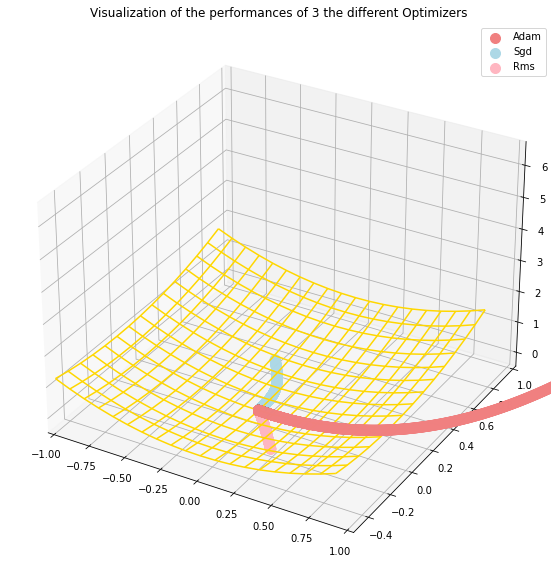

In [14]:
import matplotlib.pyplot as plt

f = lambda x, y: x**2+y**2
stochasticgd = sgd(f, random_restarts=1)
stochasticgd.descent()
trace_sgd = np.array(stochasticgd.trace)
trace_values_sgd = np.array(stochasticgd.trace_values)
adam = Adam(f, random_restarts=1)
adam.descent()
trace_adam = np.array(adam.trace)
trace_values_adam = np.array(adam.trace_values)
rms = RMSProp(f, random_restarts=1)
rms.descent()
trace_rms = np.array(rms.trace)
trace_values_rms = np.array(rms.trace_values)
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
X = np.arange(-1, 1, 0.10)
Y = np.arange(-0.5, 1, 0.10)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='gold')
ax.scatter(trace_sgd[:, 0], trace_sgd[:, 1], trace_values_sgd[1:, 0], s=100, color='lightcoral', label='Adam')
ax.scatter(trace_adam[:, 0], trace_adam[:, 1], trace_values_adam[1:, 0], s=100, color='lightblue', label='Sgd')
ax.scatter(trace_rms[:, 0], trace_rms[:, 1], trace_values_rms[1:, 0], s=100, color='lightpink', label='Rms')
ax.set_xlim(-1, 1)
ax.set_ylim(-0.5, 1)
ax.legend()
ax.set_title('Visualization of the performances of 3 the different Optimizers')
plt.show()



## Software organization
#### 1. Modules 
Our automatic differentiation package (named `Cityscape-107`) will consist of two modules:
 - A main module (`AD`) for the basic requirements of automatic differentiation. 
 - An additional module(`optimization`) will be an extension of the basic requirements. The optimization method will be used to maximize or minimize a given function making use of its derivative and maybe also making use of the rootfinder method in order to find the values for which the sderivatives become zero. 


The `AD` module has a main class called AD. It is initialized with a two arguments (value and value for the derivative) and they are stored as `self.val` and `self.der` attributes. There are several functions including the overloaded dunder methods/operations `__add__`, `__radd__`,`__mul__`, `__sub__`, `__pow__`, etc. as well as some basic functions `sin`, `cos`, `exp`, etc.


#### 2. Directory Structure 
All the modules will be found in the directory `Cityscape-107`, under subdirectories with the name of the module. There will also be a directory for `tests`, as well as `examples` and `documentation`. Additional documentation will be also provided for each individual module.

The main directory will also include files like the `.travis.yml`, `.codecov.yml`, `setup.py`, `README.md`, `LICENSE.txt` and any other necessary files.

The structure will be similar to the following example:


```python
Cityscape-107/
        cs107-FinalProject/ #main directory 
                __init__.py  
                AD/ #main module
                        __init__.py
                        ADmulti.py
                        test_ADmulti.py
                        driver.py

                optimization/ #extension 
                        __init__.py
                        optimizer.py
                        Test_Optimizer.py

                docs/ #documentation
                        images/ #contain images used in docs
                        prev_milestone_docs/ #previous milestone docs 
                        documentation.md

                .travis.yml
                README.md
                .codecov.yml
                requirements.txt
                setup.py
                LICENSE.txt #terms of distribution
                ...
```

#### 3. Distribution
We will distribute our package using `PyPI`. The files  `setup.py`, `setup.cfg`, `LICENSE.txt` and `README.md` that are outside of the `Cityscape-107` package folder are necessary for PyPI to work. 

The file `setup.py` will contain important information like:
 - the `name` and `version` of the package.
 - `download_url` (GitHub url).
 - `install_requires` (list of dependencies).
 
By uploading our package to `PyPI` it will be easy to install just by simply writting:

       $ pip install CityAD

#### 4. Testing 
We will use the continuous integration tool `Travis-CI` linked to our GitHub project to automatically test changes before integrating them into the project. This will ensure that new changes are merged only if they pass the tests and do not break our code. Our tests are located in the directories with the files they are covering. The `test_ADmulti.py` file, for example, which contains many tests for the AD function, is in the `AD` directory alongside `ADmulti.py`. 

Additionally, `Codecov` will provide coverage reports of the tests performed i.e. the percentage of our code that the tests actually tested. After tests are successfully run by `Travis-CI` a report is sent to `Codecov`, which will show the test coverage of the code in our project repository. 

#### 5. Packaging: 

We package our project following Python's official guide: https://packaging.python.org/tutorials/packaging-projects/. `setuptools` and `wheel` are used to package the project.

After packaging, it is uploaded to PyPI, so that users have easy access to it with `pip install CityAD`.













## Implementation 

#### 1. Core Class

In order to implement our Forward Mode, our core class was the AD class. 
The AD class was a representation of a Node in our computational graph. It holds as attributes a value 
and a derivative, which are computed as in the trace table. 

#### 2. Core Data Structure 

For now, our data structure only supports 1D input and 1D output. We leveraged numpy arrays as data structures
for our values and derivatives because of their convenience in term of memory and time efficiency. 
This choice has a counterpart though, we will need to handle the rigidity and the immutable aspect of these data 
structures. Furthermore, in higher dimensions, gradients are arrays and Jacobians are matrices. Numpy arrays are effective in dealing with both vectors and real values, 
supportive with efficient indexing, and allowed us to perform element-wise operation on arrays (addition on two vectors, for example) without using for loops (which are computationally and code-demanding since we need to hard-code them).


#### 3. Important attributes of the class

The important attributes of the AD class are value and derivative. We decided to define the default value of 
the derivative for a new instance to be 0. Therefore, a user could implement a *constant* via only specifying its value. However, 
this choice required that when defining a *variable*, the user should input a 1 value for the value of the 
derivative. 

The val is the value of the function at the variable where it is evaluated. The der is derivative with respect to each of the variables of function. The derivative of a variable is needed in order to instantiate AD variable (“seed” of vector) in order to specify we aren’t dealing with a constant
Der of operation on AD variables represents the jacobian of the 
function performing this operation. 

We do not keep track of the ‘order’ of dimensions wanted by the user - we just make sure to not mix up dimensions between them. Moreover, imposing an order on dummy variables does not make much sense (f(x, y, z) = f(z, y, x) mathematically). 
Therefore, when the user wishes to leverage the Jacobian, they can specify the order in which they want it using the sort() function. 


#### 4. External Dependencies

We tried to keep the external dependencies at the lowest possible. There are two reasons for that:
- User Convenience (the user does not need to install 100 packages to run our code)
- Implementation convenience (every external dependency has its own syntax in a way, and we wanted to be consistent 
in our implementation regarding design)

Therefore, the only two external dependencies needed in order to run our code are: math and numpy libraries.

#### 5. Elementary functions

We defined several elementary functions in order to define the way AD variables would interact between each other.
This has been done via overloading the elementary operations: addition, substraction, multiplication, division and power functions. 
For the division operation, we needed to pay extra attention to the __rtruediv__ operation, because of the asymmetry of this operation. 
Last, the power overloading was also delicate because of forbidden cases and the derivation of a function which exponent being another function.   
We also defined the elementary functions: trig functions, inverse trig functions, hyperbolic functions, a logistic function, exp, and log. 



## Our Extension: Applications to Optimization, Gradient Descent, and Machine Learning 
There are several computational applications that implemenent a type of gradient descent that could harness our automatic differentiation tool. In order to apply our AD tool to a neural network, for instance, we would need to have variables that stored the weights for the layers of the network, and our AD tool would be used as a step of the backpropogation methodology. 

As we discussed above, Gradient Descent is an algorithm that involves a set of parameters that will minimize a loss. It's equation looks something like this: <img src="https://render.githubusercontent.com/render/math?math=$\theta_{t+1} = \theta_t - \alpha * \Nabla_\theta* J$">

The algorithm that involves updating a set of parameters to minimize a loss, and is typically in the form of 𝜃_𝑡+1=𝜃_𝑡−𝛼∇_𝜃𝐽. The gradient here is the gradient of the loss with respect to the parameters - Automatic differentiation allows us to automate the calculation of this step / these derivatives. Our file would repeatedly make use of the AD() class to calculate the derivatives! The disadvantages of automatic differentiation outweigh the advantages in this situation. 

![images/gradientDescentPic2.jpg](images/gradientDescentPic2.jpg)

With that basic background built up (for more of an intuitive understanding, see the `Background` section of the documentation above), 
let's describe an example of where gradient descent might be used, namely the problem of predicting housing prices, i.e. the ML equivelent of "Hello World". Every machine learning model needs a problem T, a performance measure P, and a dataset E, from where our model can learn patterns. Let us say that our dataset has 781 data records, each of which has 3 features - size (square feet), school district (integer from 1-20) and price. 
In order to measure accuracy, we have to create a performance measure. We can use, for example, the Mean Squared Error (formula shown below - don't worry about the variables, the colored labels should sort out their meaning!)

![images/meanSquaredErrorFormula.jpg](images/meanSquaredErrorFormula.jpg)

Now, our goal is to build a model (a function whose parameters we are trying to find) that can take in a size and predict a housing price.
A simplified version of our end goal function is the following: 

<img src="https://render.githubusercontent.com/render/math?math=$housingPrice = weight1 * squareFootage %2B weight2*schoolDistrict">

To get started, we randomly initialize values of weight1 and weight2. Then, at each iteration, we take our dataset, feed it into our current function, and use our results to calculate our error. With that error, we can calculate the partial derivatives of the error with respect to each weight, and adjust our weights accordingly. 

<img src="https://render.githubusercontent.com/render/math?math=$\Nabla Err = [\frac{\partial}{\partial W_0}, \frac{\partial}{\partial W_1}]^T$">

We want our weights to update so that they lower our error in our next iteration, so we need to make them follow the _opposite direction_ of each respective gradient. We are going to change the weights by taking a small step of size <img src="https://render.githubusercontent.com/render/math?math=$\eta$"> in this opposite direction. Putting these steps together, we have our update step formula as: 

<img src="https://render.githubusercontent.com/render/math?math=$W_O = W_0 - \eta * \frac{\partial}{\partial W_0}$ ">


<img src="https://render.githubusercontent.com/render/math?math=$W_1 = W_1 - \eta * \frac{\partial}{\partial W_1}$"> 

We continue with these iterations until we have an error that is either 0 or below a certain threshold that we set for ourselves. 


Recall the graphic that we used to visualize 3D gradient descent from above. If we imagine <img src="https://render.githubusercontent.com/render/math?math=$\theta_0$"> 
and <img src="https://render.githubusercontent.com/render/math?math=$\theta_1$"> to be our two input features, square footage and school district, this graphic makes it very easy to visualize the process we just covered!

![images/3dgradientDescentPic.jpg](images/3dgradientDescentPic.jpg)

Now that we've built a solid understanding of the process of gradient descent, let us explore our extension and how we built it. Our `Optimizer.py` file contains 4 classes: an `Optimizer()` class, along with three Gradient Descent Algorithms that inherit the `Optimizer()` class: `Adam(Optimizer)`, `stg(Optimizer)` (Stochastic Gradient Descent), and `RMSProp(Optimizer)`. 

Our `Optimizer()` class essentially builds a base gradient descent framework whose parameters (i.e. batch data sets, adaptive learning rate) can then be modified in classes that inherit it for a more customized experience. 
`Optimizer()` consists of 5 methods: 
- `__init__()`, which initializes and returns an object of the class Optimizer, allowing a user to optimize a function based on a descent method of their choice
- `__str__()`, a tostring method
- `produce_random_points()`, a function which allows a user to produce random initialziation points in order to start the process of gradient descent when they don't wish to individually specify them. It infers dimensionality of the inputs and returns points sampled from a gaussian distribution. 
- `annealing()`, a function which essentially allows the user to fine tune their original points so that they start off on the right foot, accelerating the optimization algorithm. At tthe moment, it only supports the quadratic function. 
- `descent()`, a function which actually runs our gradient descent algorithm to minimize a function. 

We then inherit `Optimizer()` into 3 other classes: 
- `Adam(Optimizer)`, which uses the default values we define for the parameters. By default, we have an adaptive learning rate for each weight that changes depending on the accumulated squared gradients until that iteration. Adam also keeps an exponentially decaying average of past gradients, similar to momentum (a method that essentially helps accelerate gradient descent and reduces the oscillation). 
- `sgd(Optimizer)`, which reverts some of our default parameters that implemented "momentum"  for a standard, classic gradient descent method. This is stochastic gradient descent without any of our special parameters, like momentum, adaptive learning rate, etc. 

- `RMSProp(Optimizer)`, which also (1) removes momentum and (2) adds an adaptive learning rate that changes depending on the accumulated squared gradients until that iteration (like in Adam). 

Each of these classes have `__init__()` methods and `__str__()` methods. 


#### Other Examples: 
We also implemented a driver for Newton's Root Finding Method for vector valued functions of vector variables. You can find this in the `examples` folder of our codebase. Newton's method, or the Newton-Raphson method, produces successively better approximations to the roots (or zeroes) of a real-valued function. It uses an initial guess and the function's derivative to approximate the root. 



## Broader Impact:
As we discussed above, automatic differentiation has an incredible and a wide spread array of applications. And while there might not be a way to “misuse” the simple practice of taking derivatives, the applications in which Automatic Differentiation is used, especially Artificial Intelligence and Optimization, are ripe for misuse. Much in the same way that biased datasets lead to biased ML models and biased predictions, if our automatic differentiation library gives incorrect values or values that don’t have a high accuracy, the use of those values in real-life algorithms can lead to issues.  AI and Machine Learning, is, at its core, simply math - derivatives and gradients taken across a dataset to minimize a certain loss. If we incorrectly calculate these values, our algorithm could arrive at results that could have harmful effects on the very people they are meant to help. These algorithms range from weather prediction models to algorithms that determine bail amounts and the length of someone’s prison sentence. This comes back to an idea that our society is grappling with at the moment - while Automatic Differentiation and its uses in optimization (the extension that we implemented) and machine learning algorithms are powerful, we must take careful steps that every major decision the algorithm makes is human-reviewed by a diverse and responsible board with a knowledge of the subject area. Algorithms are only as powerful as the people who design them, and we can ensure that they are used in the best way possible by creating a culture of responsibility and ethical-based review in our codebase and community. 

## Software Inclusivity: 
We developed this project using github version control, a system that is often quite difficult and confusing to understand in the very beginning of stages of trying to use it. People who might not have access to a robust and in-depth computer science education might find it difficult to contribute to this project because they aren’t familiar with branching, committing, pushing, and pulling from github. These groups include several underrepresented minorities, including women, Black, Latinx, and Native Americans. This also includes people in rural and urban areas who might not have access to a CS education that includes concepts like git and version control. As someone who learned about these concepts quite late in her CS education as well, I can testify to the fact that “software development” as a practice can often be quite intimidating and can keep bright and talented people from pursuing the field because of how much prior knowledge of “arcane” (but necessary) things like git. 

Once a developer has made themselves comfortable with the codebase and with the practice of version control, we have a very fair and open system of code contribution. After making a branch, developers can create Pull Requests that are approved by either a few members of the team (if the PR involves a small change, such as a bug fix or comment) or all members of the team (if the PR involves major changes such as a new feature, test, or method). If reviewers have any questions, they leave them in the Comments space of the PR and the developer can respond to them as needed. If our organization was bigger, we would make sure to hire developers who are diverse in age, race, gender, and sexual orientation in order to make everyone feel completely comfortable adding radical features, challenging their peers and having respectful disagreements, and overall contributing to a more robust and dynamic codebase and product. 


## Future
In line with the tech community's growing emphasis on / acknowledgement of the fact that as developers and researchers, we must be acutely aware of the impacts of our work, it would be very cool to create another extension of our AD package that creates a "Effects of Biased Data" visualizer. Although there is a growing interest in post-processing bias mitigation methods, the most common and spoken-about cause of AI and ML model bias is rooted in biased, unrepresentative datasets. Google, IBM, and Microsoft all came under fire for releasing computer vision models (which also use backpropogation and automatic differentiation, another possible future extension) that were unable to recognize african american women. The main reason for this inability? A dataset that didn't have nearly enough women of color as compared to white men and women. 

An "Effects of Biased Data Visualizer" could use an Automatic Differentiation core to visually show the changing accuracies of computer vision models as the datasets on which they are trained become more diverse and representative of the world around us. In the same way that we built an "Optimizer" extension with an AD core, we could build a Computer Vision extension and then create a visualization that shows (perhaps in graph form) how a model's ability to perform on images of underrepresented minorities changes as its dataset becomes more diverse. 

To consider some future features for our optimization extension, we think of a more refined optimization tool. One of the risks of running gradient descent is the chance that you might find yourself “stuck” in a local optima instead of a global one. (Graphic visually explaining this shown below). One way to prevent this is (mini) batch stochastic gradient descent, which is something we could work on in the future. 
Additionally, we would like to find a way to tune initialization points for functions that are not quadratic, maybe leveraging Markov Chain Monte Carlo sampling. 


![images/localGlobalMinima.png](images/localGlobalMinima.png)




Additionally, thinking beyond extensions rooted in computer science, Automatic Differentiation has a whole host of applications in the natural sciences! We could implement a specific automatic differentiation technique called "interface contraction" that is commonly used in biostatistical analysis. Interface contraction makes derivative computation more effecient by taking advantage of the fact that the number of variables passed between subroutines is often very small compared to the number of variables with respect to which you want to differentiate. It has been famously used in a study analyzing the relationships of age and dietary intake with risk of developing breast cancer in a cohort of 89,538 nurses. Implementing this type of AD for use in biostatistics would be fascinating and an excellent way to show the many applications of Automatic Differentiation. 










